In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [30]:
!pip install autots

In [58]:
# ML Model import
from autots import AutoTS, load_daily
from autots.models.model_list import model_lists

In [110]:
# sample
long = False
df_wide = load_daily(long=long)

In [111]:
# Load time series dataset with a time/date column
df = pd.read_csv('https://raw.githubusercontent.com/icheung487/Final_Project/main/test_sample_data3.csv', usecols=['Last_Update', 'Confirmed_Cases', 'Lat', 'Long_', 'Country_Region'])
df['Last_Update'] = pd.to_datetime(df['Last_Update'])
df = df.sort_values('Last_Update')
df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed_Cases
0,US,2020-06-09,34.223334,-82.461707,58
2461,US,2020-06-09,41.685007,-95.310156,39
2462,US,2020-06-09,38.214760,-85.194223,219
2463,US,2020-06-09,39.797425,-92.076350,1
2464,US,2020-06-09,40.331635,-84.202582,49


In [112]:
df.dtypes

Country_Region             object
Last_Update        datetime64[ns]
Lat                       float64
Long_                     float64
Confirmed_Cases             int64
dtype: object

In [113]:
# US DF
US_df = df[df["Country_Region"] == "US"]
US_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed_Cases
0,US,2020-06-09,34.223334,-82.461707,58
2461,US,2020-06-09,41.685007,-95.310156,39
2462,US,2020-06-09,38.214760,-85.194223,219
2463,US,2020-06-09,39.797425,-92.076350,1
2464,US,2020-06-09,40.331635,-84.202582,49


In [114]:
type(US_df.index)

pandas.core.indexes.numeric.Int64Index

In [115]:
US_df = US_df.set_index("Last_Update")
US_df

,Country_Region,Lat,Long_,Confirmed_Cases
Last_Update,,,,
2020-06-09,US,34.223334,-82.461707,58
2020-06-09,US,41.685007,-95.310156,39
2020-06-09,US,38.214760,-85.194223,219
2020-06-09,US,39.797425,-92.076350,1
2020-06-09,US,40.331635,-84.202582,49
...,...,...,...,...
2021-02-02,US,37.413913,-88.561521,264
2021-04-02,US,60.388600,-162.890520,187
2021-04-02,US,61.166660,-149.900000,258


In [136]:
type(US_df.index)

pandas.core.indexes.range.RangeIndex

# **MODEL LIST FORECASTING**
https://winedarksea.github.io/AutoTS/build/html/source/tutorial.html

In [117]:
# add weights
weights_daily = {'Confirmed_Cases': 5}

In [118]:
# model list
model_list = [
              'Last_Update',
              'Country_Region',
              'Confirmed_Cases',
]

In [122]:
# model
model = AutoTS(
    forecast_length=7,
    frequency='infer',
    prediction_interval=0.95,
    ensemble=['simple', 'horizontal-min'],
    max_generations=5,
    num_validations=2,
    validation_method='seasonal 168',
    model_list='fast',
    transformer_list='all',
    models_to_validate=0.2,
    drop_most_recent=1,
    n_jobs='',
)

In [123]:
# fit
model = model.fit(
    df_wide,
    weights=weights_daily,
)

Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 5
Model Number: 2 with model AverageValueNaive in generation 0 of 5
Model Number: 3 with model AverageValueNaive in generation 0 of 5
Model Number: 4 with model DatepartRegression in generation 0 of 5
Model Number: 5 with model DatepartRegression in generation 0 of 5
Template Eval Error: TypeError("'<' not supported between instances of 'str' and 'int'") in model 5: DatepartRegression
Model Number: 6 with model DatepartRegression in generation 0 of 5
Model Number: 7 with model DatepartRegression in generation 0 of 5
Epoch 1/50
9/9 [==============================] - 12s 10ms/step - loss: 0.3839
Epoch 2/50
9/9 [==============================] - 0s 13ms/step - loss: 0.3775
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 0.3735
Epoch 4/50
9/9 [==============================] - 0s 12ms/step - loss: 0.3667
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.357

In [126]:
# predict
prediction = model.predict()
forecasts_df = prediction.forecast

In [133]:
print(model)

Initiated AutoTS object with best model: 
Ensemble
{}
{'model_name': 'Horizontal', 'model_count': 6, 'model_metric': 'Score-min', 'models': {'a45ee8ae500e0fdd93d325ab25fd7180': {'Model': 'VECM', 'ModelParameters': '{"deterministic": "lo", "k_ar_diff": 2, "regression_type": null}', 'TransformationParameters': '{"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "ClipOutliers", "2": "QuantileTransformer", "3": "Discretize", "4": "RobustScaler"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"method": "clip", "std_threshold": 3, "fillna": null}, "2": {"output_distribution": "uniform", "n_quantiles": 87}, "3": {"discretization": "lower", "n_bins": 10}, "4": {}}}'}, '298292b9e425dab96c921b316edb6335': {'Model': 'AverageValueNaive', 'ModelParameters': '{"method": "Mean"}', 'TransformationParameters': '{"fillna": "median", "transformations": {"0": "Detrend", "1": "SeasonalDifference"}, "transformation_params": {"0": {"model": "Linear

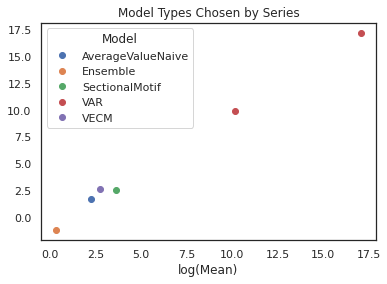

In [127]:
if model.best_model_ensemble == 2:
    model.plot_horizontal()

In [131]:
upper_forecasts_df = prediction.upper_forecast
upper_forecasts_df

,Glendora.CA.PM2.5,Minneapolis.PM2.5,US.Covid.Positive.Increase,US.Total.Covid.Tests,T10YIE,DCOILWTICO
2020-09-25,42.418751,13.965261,47830.936545,9.939078e+07,1.641255,39.388908
2020-09-26,42.418751,14.879351,49330.449756,1.003406e+08,1.658805,41.870628
2020-09-27,42.418751,13.136624,53571.458190,1.013499e+08,1.696565,42.670847
2020-09-28,42.418751,13.179808,53869.216333,1.022436e+08,1.722816,44.915194
2020-09-29,42.418751,14.093898,55025.667756,1.032054e+08,1.726646,44.506221
2020-09-30,42.418751,13.779808,54840.601505,1.041819e+08,1.734373,44.514495
2020-10-01,42.418751,13.036624,54920.288762,1.052444e+08,1.743923,44.966429


In [132]:
lower_forecasts_df = prediction.lower_forecast
lower_forecasts_df

,Glendora.CA.PM2.5,Minneapolis.PM2.5,US.Covid.Positive.Increase,US.Total.Covid.Tests,T10YIE,DCOILWTICO
2020-09-25,13.511516,4.370023,35545.673223,9.916638e+07,1.554123,37.882730
2020-09-26,13.957088,5.284113,33352.215213,9.996061e+07,1.529660,36.093405
2020-09-27,14.108068,3.541386,35443.499214,1.008084e+08,1.541737,35.950700
2020-09-28,14.237708,3.584570,35002.593875,1.015264e+08,1.547848,35.959113
2020-09-29,14.360738,4.498660,35954.685719,1.023107e+08,1.533101,33.383612
2020-09-30,14.436934,4.184570,35320.595404,1.031125e+08,1.525055,30.927639
2020-10-01,14.512250,3.441386,34468.425061,1.039948e+08,1.521247,27.820558


# **AUTOTS SIMPLE EXAMPLE**

In [134]:
# Simple Example
US_df = load_daily(long=True)

In [149]:
model = AutoTS(
    forecast_length=7,
    frequency='infer',
    ensemble='simple',
    max_generations=5,
    num_validations=2,
)

## ERROR WITH INDEX (LAST_UPDATE) NOT DATETIME FORMAT

In [150]:
odel = model.fit(US_df, date_col='Last_Update', value_col='Confirmed_Cases', id_col='Country_region')

ValueError: ignored

# **OLD AUTOTS MODEL**
https://towardsdatascience.com/train-multiple-time-series-forecasting-models-in-one-line-of-python-code-615f2253b67a

In [ ]:
# Split data to train and test
train_df = US_df.iloc[:2464]
test_df = US_df.iloc[2464:]

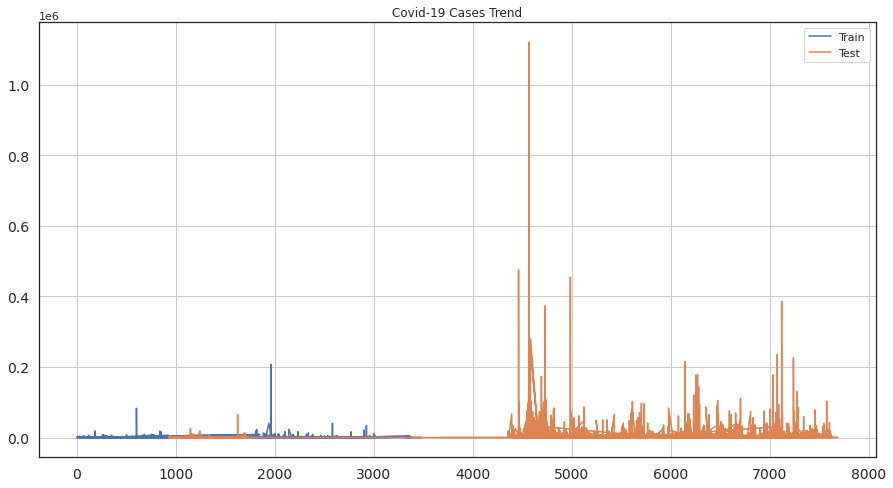

In [ ]:
# Visualize train test value
train_df.Confirmed_Cases.plot(figsize=(15,8), title= "Covid-19 Cases Trend",
fontsize=14, label="Train")
test_df.Confirmed_Cases.plot(figsize=(15,8), title= "Covid-19 Cases Trend",
fontsize=14, label="Test")
plt.legend()
plt.grid()
plt.show()

# ERROR WITH PARAMS NOT MATCHING UPDATED MODEL
- MODEL AND FIT



In [57]:
# Initialize Auto-TS model object and fit training data
model = AutoTS(forecast_length=7, frequency="infer",  model_list="fast")
model.fit(train_df, date_col="Last_Update", value_col="Confirmed_Cases", id_col="Country_Region")

ValueError: ignored

### linear regression model to predict Covid cases

In [ ]:
df = pd.read_csv(Path('test_sample_data3.csv'))
df

,City,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed_Cases,Deaths,Recovered,Cases_Per_Day,Incident_Rate,Case_Fatality_Ratio
0,Abbeville,South Carolina,US,2020-06-09,34.223334,-82.461707,58,0,0.0,58.0,236.474090,0.000000
1,Acadia,Louisiana,US,2020-06-09,30.295065,-92.414197,513,29,0.0,484.0,826.819244,5.653021
2,Accomack,Virginia,US,2020-06-09,37.767072,-75.632346,983,13,0.0,970.0,3041.836861,1.322482
3,Ada,Idaho,US,2020-06-09,43.452658,-116.241552,844,22,0.0,822.0,175.253900,2.606635
4,Adair,Iowa,US,2020-06-09,41.330756,-94.471059,9,0,0.0,9.0,125.838926,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
7710,NaN,NaN,Tonga,2021-02-02,-21.179000,-175.198200,0,0,0.0,0.0,0.000000,NaN
7711,NaN,NaN,Winter Olympics 2022,2021-02-02,39.904200,116.407400,0,0,0.0,0.0,0.000000,0.000000
7712,NaN,NaN,Antarctica,2021-02-02,-71.949900,23.347000,0,0,0.0,0.0,0.000000,0.000000
7713,NaN,Jersey,United Kingdom,2021-02-02,49.213800,-2.135800,3150,66,0.0,0.0,0.000000,0.000000


In [ ]:
len(df)

7715

In [ ]:
print(df.dtypes)
print(df.shape)

City                    object
Province_State          object
Country_Region          object
Last_Update             object
Lat                    float64
Long_                  float64
Confirmed_Cases          int64
Deaths                   int64
Recovered              float64
Cases_Per_Day          float64
Incident_Rate          float64
Case_Fatality_Ratio    float64
dtype: object
(7715, 12)


In [ ]:
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()
df_cat

['City', 'Province_State', 'Country_Region', 'Last_Update']

In [ ]:
display(list(df.columns.values))

['City',
 'Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed_Cases',
 'Deaths',
 'Recovered',
 'Cases_Per_Day',
 'Incident_Rate',
 'Case_Fatality_Ratio']

In [ ]:
# Generate our categorical variable lists
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()
df_cat

['City', 'Province_State', 'Country_Region', 'Last_Update']

In [ ]:
#y = df["Confirmed_cases"]
#X = df.drop(columns="Confirmed_cases")

#separate the other attributes from the predicting attribute
#x = df.drop('Confirmed_Cases_Per_Day',axis=1)
#separte the predicting attribute into Y for model training 
#y = ['Confirmed_Cases_Per_Day']


In [ ]:
#separate the other attributes from the predicting attribute
x = ['Country_Region']
#separte the predicting attribute into Y for model training 
y = ['Confirmed_Cases']

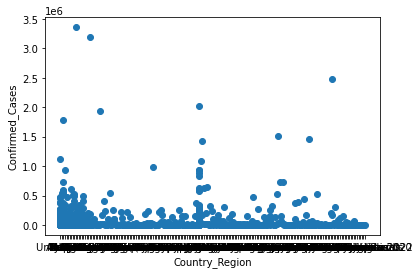

In [ ]:
# visually inspect the relationship
plt.scatter(df.Country_Region, df.Confirmed_Cases)
plt.xlabel('Country_Region')
plt.ylabel('Confirmed_Cases')
plt.show()

In [ ]:
X = df['Country_Region']
y = df['Confirmed_Cases']

In [ ]:
X = df.Country_Region.values.reshape(-1, 1)

In [ ]:
X[:5]

array([['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US']], dtype=object)

In [ ]:
y.shape

(7715,)

#### Encoding the categorical variables

In [ ]:

#Binary encoding using Pandas (multiple columns)
df = pd.get_dummies(df)#=["City", "Province_State","Country_Region" ])
df.head()


,Lat,Long_,Confirmed_Cases,Deaths,Recovered,Cases_Per_Day,Incident_Rate,Case_Fatality_Ratio,City_Abbeville,City_Acadia,...,Country_Region_Zimbabwe,Last_Update_2020-06-09,Last_Update_2020-08-04,Last_Update_2020-08-07,Last_Update_2020-12-21,Last_Update_2021-01-08,Last_Update_2021-01-24,Last_Update_2021-02-02,Last_Update_2021-04-02,Last_Update_2022-01-25
0,34.223334,-82.461707,58,0,0.0,58.0,236.474090,0.000000,1,0,...,0,1,0,0,0,0,0,0,0,0
1,30.295065,-92.414197,513,29,0.0,484.0,826.819244,5.653021,0,1,...,0,1,0,0,0,0,0,0,0,0
2,37.767072,-75.632346,983,13,0.0,970.0,3041.836861,1.322482,0,0,...,0,1,0,0,0,0,0,0,0,0
3,43.452658,-116.241552,844,22,0.0,822.0,175.253900,2.606635,0,0,...,0,1,0,0,0,0,0,0,0,0
4,41.330756,-94.471059,9,0,0.0,9.0,125.838926,0.000000,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Give X new value after encoding

In [ ]:
X=df.drop(['Confirmed_Cases'], axis=1)
y = df['Confirmed_Cases']

In [ ]:
X[:5]

,Lat,Long_,Deaths,Recovered,Cases_Per_Day,Incident_Rate,Case_Fatality_Ratio,City_Abbeville,City_Acadia,City_Accomack,...,Country_Region_Zimbabwe,Last_Update_2020-06-09,Last_Update_2020-08-04,Last_Update_2020-08-07,Last_Update_2020-12-21,Last_Update_2021-01-08,Last_Update_2021-01-24,Last_Update_2021-02-02,Last_Update_2021-04-02,Last_Update_2022-01-25
0,34.223334,-82.461707,0,0.0,58.0,236.474090,0.000000,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30.295065,-92.414197,29,0.0,484.0,826.819244,5.653021,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,37.767072,-75.632346,13,0.0,970.0,3041.836861,1.322482,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,43.452658,-116.241552,22,0.0,822.0,175.253900,2.606635,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,41.330756,-94.471059,0,0.0,9.0,125.838926,0.000000,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y[:5]

0     58
1    513
2    983
3    844
4      9
Name: Confirmed_Cases, dtype: int64

In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [ ]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5786, 2736)
(1929, 2736)
(5786,)
(1929,)


In [ ]:
#create an instance of the linear regression model.
model = LinearRegression()

In [ ]:
#After a model is instantiated, it will analyze the data and attempt to learn patterns in the data. 
# fitting or training:
#model.fit(X, y)

In [ ]:
#After the learning stage, the predict() method is used to generate predictions: 
#y_pred = model.predict(X)
#print(y_pred.shape)

In [ ]:
#plt.scatter(X, y)
#plt.plot(X, y_pred, color='red')
#plt.show()

In [ ]:
#Finally, we can examine the specific parameters of our model: the slope and the y-intercept. 
#The slope is represented by model.coef_, and model.intercept_ is the y-intercept:
#print(model.coef_)
#print(model.intercept_)